In [ ]:
#Class Two: Intro to Machine Learning and AI 
#Introductory Tutorial on Random Forests for People Analytics 
#Professor Douglas Guilbeault
#January 2021

#This Tutorial is adapted from: hhttps://www.datacamp.com/community/tutorials/random-forests-classifier-python
#You are encouraged to view the original source for further detail. 
#Note: this is a basic introduction and should be used as a launch pad for those seeking to learn more 
#about how to run random forests for People Analytics. Please write to me if you would like to learn more 
#douglas.guilbeault@haas.berkeley.edu

In [17]:
from sklearn import datasets
#The package sklearn contains a function for splitting your data into test sets and training sets 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd

In [44]:
#Note this tutorial is built on a mock dataset, though the method demonstrated will work 
#on any appropriately structured dataset
raw_employee_data = datasets.load_iris()

In [45]:
raw_employee_data.feature_names = ['Experience_Score', 'IQ_Score', 'Recommendation_Score', 'Productivity_Score']

In [47]:
raw_employee_df=pd.DataFrame({
    'Experience_Score':raw_employee_data.data[:,0],
    'IQ_Score':raw_employee_data.data[:,1],
    'Recommendation_Score':raw_employee_data.data[:,2],
    'Productivity_Score':raw_employee_data.data[:,3],
    'Hire':raw_employee_data.target
})

#Hire has three categories: 0 for no interview, 1 for interview, and 2 for make offer
raw_employee_df.head()

,Experience_Score,IQ_Score,Recommendation_Score,Productivity_Score,Hire
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split data into training and test set

In [48]:
X=raw_employee_df[['Experience_Score', 'IQ_Score', 'Recommendation_Score', 'Productivity_Score']]  # Features
y=raw_employee_df['Hire']  # Labels

# Split dataset into training set and test set
#After splitting, you will train the model on the training set and perform predictions on the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

### Train model on the training data and generate predictions on test set

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Evaluate the accuracy of the model

In [50]:
#Evaluate the accuracy of the model 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### Generate prediction for new employee

In [51]:
#Rememeber, the outcome variable is 'Hire' which has three categories: 
#0 for no interview, 1 for interview, and 2 for make offer

#These are the scores of a new potential applicant
new_Experience_Score = 3
new_IQ_Score = 5
new_Recommendation_Score = 4
new_Productivity_Score = 2

In [52]:
#Generate the model's prediction
clf.predict([[new_Experience_Score, new_IQ_Score, new_Recommendation_Score, new_Productivity_Score]])

array([2])

### Identify which features are most important for the predictions of your random forest algorithm

In [53]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [54]:
#View the importance of features
feature_imp = pd.Series(clf.feature_importances_,index=raw_employee_data.feature_names).sort_values(ascending=False)
feature_imp

Recommendation_Score    0.463847
Productivity_Score      0.428769
Experience_Score        0.081139
IQ_Score                0.026245
dtype: float64

No handles with labels found to put in legend.


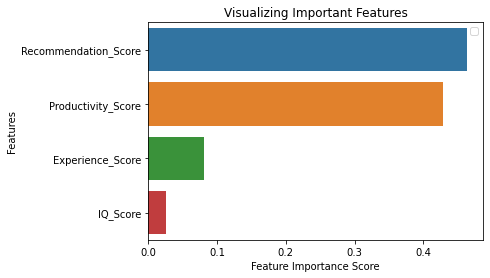

In [55]:
#Visualize the importance of features 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()